In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import datetime

In [3]:
df = pd.read_csv('E-commerce Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [5]:
df.head(5)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [6]:
df.shape

(51290, 16)

In [7]:
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [8]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Aging', 'Customer_Id', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost'],
      dtype='object')

In [9]:
df.select_dtypes(include=['object']).columns

Index(['Order_Date', 'Time', 'Gender', 'Device_Type', 'Customer_Login_type',
       'Product_Category', 'Product', 'Order_Priority', 'Payment_method'],
      dtype='object')

In [10]:
# df_new without missing values
df_new = df.dropna()

In [11]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

In [12]:
df_new.shape

(51282, 16)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51282 non-null  object 
 1   Time                 51282 non-null  object 
 2   Aging                51282 non-null  float64
 3   Customer_Id          51282 non-null  int64  
 4   Gender               51282 non-null  object 
 5   Device_Type          51282 non-null  object 
 6   Customer_Login_type  51282 non-null  object 
 7   Product_Category     51282 non-null  object 
 8   Product              51282 non-null  object 
 9   Sales                51282 non-null  float64
 10  Quantity             51282 non-null  float64
 11  Discount             51282 non-null  float64
 12  Profit               51282 non-null  float64
 13  Shipping_Cost        51282 non-null  float64
 14  Order_Priority       51282 non-null  object 
 15  Payment_method       51282 non-null 

In [14]:
df_new.describe().round(2)

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51282.00,51282.00,51282.00,51282.00,51282.00,51282.00,51282.00
mean,5.26,58159.75,152.34,2.50,0.30,70.40,7.04
std,2.96,26031.76,66.49,1.51,0.13,48.73,4.87
min,1.00,10000.00,33.00,1.00,0.10,0.50,0.10
25%,3.00,35841.50,85.00,1.00,0.20,24.90,2.50
50%,5.00,61021.50,133.00,2.00,0.30,59.90,6.00
75%,8.00,80739.25,218.00,4.00,0.40,118.40,11.80
max,10.50,99999.00,250.00,5.00,0.50,167.50,16.80


In [ ]:
df_small = df_new.sample(frac=0.04)

In [ ]:
df_small.shape

(2051, 16)

In [ ]:
df_new.shape

(51282, 16)

**Add the column - amount_spent**

In [ ]:
df_small['amount_spent'] = df_new['Quantity'] * df_new['Sales']

In [ ]:
df_small.keys()

Index(['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method', 'amount_spent'],
      dtype='object')

In [ ]:
df_small.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,amount_spent
28385,2018-04-26,20:28:28,5.0,84578,Female,Web,Member,Home & Furniture,Curtains,34.0,1.0,0.2,17.0,1.7,Medium,credit_card,34.0
19793,2018-04-04,17:29:15,8.0,25315,Female,Web,Member,Electronic,LED,192.0,1.0,0.2,92.8,9.3,Medium,credit_card,192.0
39672,2018-11-06,22:57:33,9.0,86708,Female,Web,Member,Fashion,Running Shoes,224.0,2.0,0.5,121.6,12.2,Medium,credit_card,448.0
31635,2018-11-22,17:22:35,5.0,78735,Female,Web,Member,Home & Furniture,Towels,228.0,1.0,0.4,138.9,13.9,Medium,credit_card,228.0
24580,2018-07-23,12:58:28,3.0,20022,Male,Mobile,Member,Fashion,Shirts,196.0,2.0,0.1,112.1,11.2,High,credit_card,392.0


In [ ]:
# rearrange all the columns for easy reference
df_small = df_small[['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'amount_spent', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method']]

In [ ]:
df_small.head(5)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,amount_spent,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
28385,2018-04-26,20:28:28,5.0,84578,Female,Web,Member,Home & Furniture,Curtains,34.0,1.0,34.0,0.2,17.0,1.7,Medium,credit_card
19793,2018-04-04,17:29:15,8.0,25315,Female,Web,Member,Electronic,LED,192.0,1.0,192.0,0.2,92.8,9.3,Medium,credit_card
39672,2018-11-06,22:57:33,9.0,86708,Female,Web,Member,Fashion,Running Shoes,224.0,2.0,448.0,0.5,121.6,12.2,Medium,credit_card
31635,2018-11-22,17:22:35,5.0,78735,Female,Web,Member,Home & Furniture,Towels,228.0,1.0,228.0,0.4,138.9,13.9,Medium,credit_card
24580,2018-07-23,12:58:28,3.0,20022,Male,Mobile,Member,Fashion,Shirts,196.0,2.0,392.0,0.1,112.1,11.2,High,credit_card


**How much money spent by the customers?**

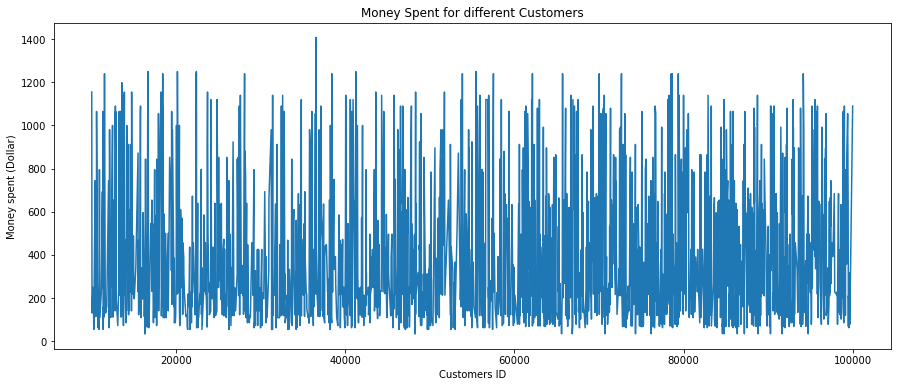

In [ ]:
money_spent = df_small.groupby(by=['Customer_Id','Gender'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.Customer_Id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

**Check TOP 5 highest money spent**

In [ ]:
print('The TOP 5 customers with highest money spent')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent


,Customer_Id,Gender,amount_spent
535,36555,Male,1408.0
253,22402,Male,1250.0
131,16695,Male,1250.0
903,55451,Female,1250.0
208,20163,Male,1250.0


In [ ]:
# convert the Order_Date column from string to datetime
df_small['Order_Date'] = pd.to_datetime(df_small['Order_Date'])

**Add the columns - Month, Day and Hour**

In [ ]:
df_small.insert(loc=2, column='year_month', value=df_small['Order_Date'].map(lambda x: 100*x.year + x.month))
df_small.insert(loc=3, column='month', value=df_small.Order_Date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_small.insert(loc=4, column='day', value=(df_small.Order_Date.dt.dayofweek)+1)
df_small.insert(loc=5, column='hour', value=df_small.Order_Date.dt.hour)

In [ ]:
df_small

,Order_Date,Time,year_month,month,day,hour,Aging,Customer_Id,Gender,Device_Type,...,Product_Category,Product,Sales,Quantity,amount_spent,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
28385,2018-04-26,20:28:28,201804,4,4,0,5.0,84578,Female,Web,...,Home & Furniture,Curtains,34.0,1.0,34.0,0.2,17.0,1.7,Medium,credit_card
19793,2018-04-04,17:29:15,201804,4,3,0,8.0,25315,Female,Web,...,Electronic,LED,192.0,1.0,192.0,0.2,92.8,9.3,Medium,credit_card
39672,2018-11-06,22:57:33,201811,11,2,0,9.0,86708,Female,Web,...,Fashion,Running Shoes,224.0,2.0,448.0,0.5,121.6,12.2,Medium,credit_card
31635,2018-11-22,17:22:35,201811,11,4,0,5.0,78735,Female,Web,...,Home & Furniture,Towels,228.0,1.0,228.0,0.4,138.9,13.9,Medium,credit_card
24580,2018-07-23,12:58:28,201807,7,1,0,3.0,20022,Male,Mobile,...,Fashion,Shirts,196.0,2.0,392.0,0.1,112.1,11.2,High,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14680,2018-12-12,17:42:52,201812,12,3,0,10.0,38180,Male,Web,...,Fashion,Sports Wear,85.0,5.0,425.0,0.4,17.0,1.7,High,credit_card
14391,2018-04-18,10:10:39,201804,4,3,0,1.0,40150,Male,Web,...,Fashion,Shirts,196.0,1.0,196.0,0.4,104.2,10.4,Medium,credit_card
11198,2018-04-06,16:54:08,201804,4,5,0,9.0,56042,Female,Web,...,Fashion,Titak watch,228.0,1.0,228.0,0.3,141.2,14.1,High,credit_card
12862,2018-07-12,01:27:52,201807,7,4,0,4.0,42140,Female,Web,...,Fashion,Shirts,196.0,1.0,196.0,0.3,98.4,9.8,Medium,credit_card


Text(0, 0.5, 'Number of Order Priority')

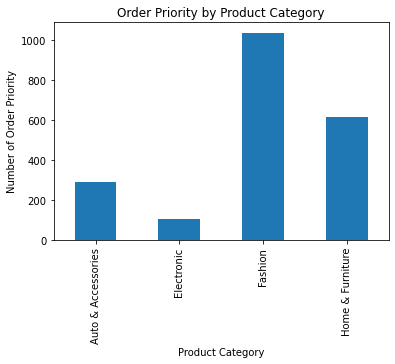

In [ ]:
# Plot a bar graph of the order priority for each product category
df_small.groupby('Product_Category').count()['Order_Priority'].plot(kind='bar')

# Add a title and axis labels to the graph
plt.title("Order Priority by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Order Priority")

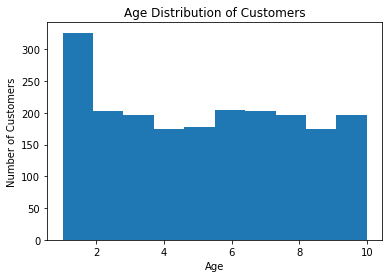

In [ ]:
# Plot a histogram of the age of customers
df_small['Aging'].plot(kind='hist')

# Add a title and axis labels to the graph
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

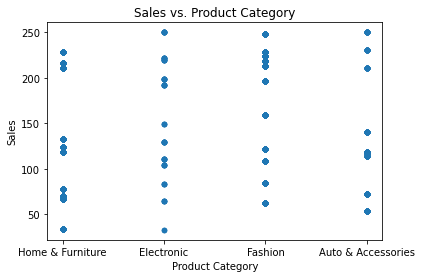

In [ ]:
# Plot a scatter plot of  vs. age
df_small.plot(kind='scatter', x='Product_Category', y='Sales')

# Add a title and axis labels to the graph
plt.title("Sales vs. Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales")

# Show the plot
plt.show()

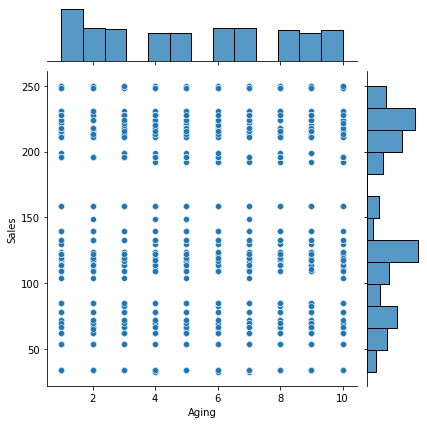

In [ ]:
# Plot a scatter plot of sales vs. age
sns.jointplot(x='Aging', y='Sales', data=df_small)

# Show the plot
plt.show()

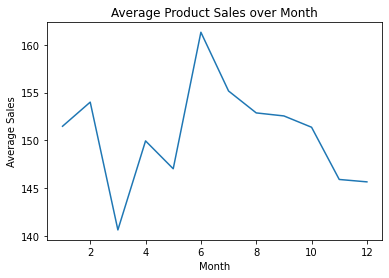

In [ ]:
# Plot a line graph of the average sales of products over time
df_small.groupby(['month']).mean()['Sales'].plot(kind='line')

# Add a title and axis labels to the graph
plt.title("Average Product Sales over Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")

# Show the plot
plt.show()

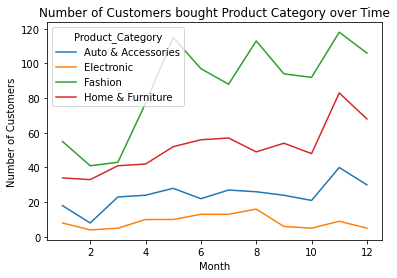

In [ ]:
#Plot a line graph of the number of customers bought product category over time
df_small.groupby(['month', 'Product_Category']).count()['Customer_Id'].unstack().plot(kind='line')

# Add a title and axis labels to the graph
plt.title("Number of Customers bought Product Category over Time")
plt.xlabel("Month")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()